In [7]:
import skfuzzy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

**DATA1.CSV**

In [8]:
### read file from csv - part
df = pd.read_csv('data1.csv')
df

,X,Y,Class
0,5.50,7.00,1
1,9.40,13.00,1
2,6.00,6.80,1
3,12.50,13.00,0
4,5.50,5.60,1
...,...,...,...
207,12.72,12.05,0
208,11.24,9.73,0
209,14.65,10.31,0
210,14.84,10.78,0


In [9]:
## Source = https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

## Normalize X,Y - using MaxMinScaler

# df[['X','Y']]
scaler = MinMaxScaler()
scaler.fit(df[['X','Y']])
df[['X', 'Y']] = scaler.transform(df[['X', 'Y']])
df


,X,Y,Class
0,0.279419,0.434318,1
1,0.481597,0.811439,1
2,0.305340,0.421747,1
3,0.642302,0.811439,0
4,0.279419,0.346323,1
...,...,...,...
207,0.653707,0.751728,0
208,0.576983,0.605908,0
209,0.753758,0.642363,0
210,0.763608,0.671904,0


In [10]:
## FCM algorithm

def fcm_algorithm(data , c):
    cntr, u, u0, d, jm, p, fpc = skfuzzy.cluster.cmeans(data.T, c, 2, error=0.005, maxiter=1000, init=None)

    cluster_membership = np.argmax(u, axis=0)
    fig, ax = plt.subplots()
    
    # Plotting the data points for each cluster
    for i in range(c):
        ax.plot(data[cluster_membership == i, 0], data[cluster_membership == i, 1], 'o', label=f'Cluster {i + 1}')

    # Plotting the cluster centers with their own colors and labels
    for i, cluster_center in enumerate(cntr):
        ax.plot(cluster_center[0], cluster_center[1], '*', markersize=15, markeredgewidth=2, color=f'C{i}', label=f'Centroid {i + 1}')

    ax.set_title(f'Fuzzy C-Means Clustering with c= {c}')
    leg = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout to make space for the legend
    plt.show()
    return fpc

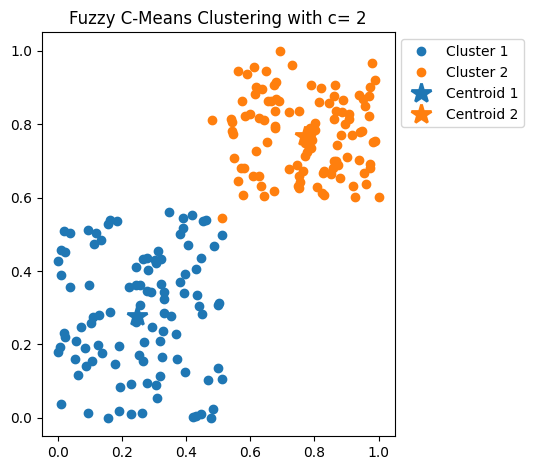

FPC :  0.868589099076744

 --------------------------------------------- 



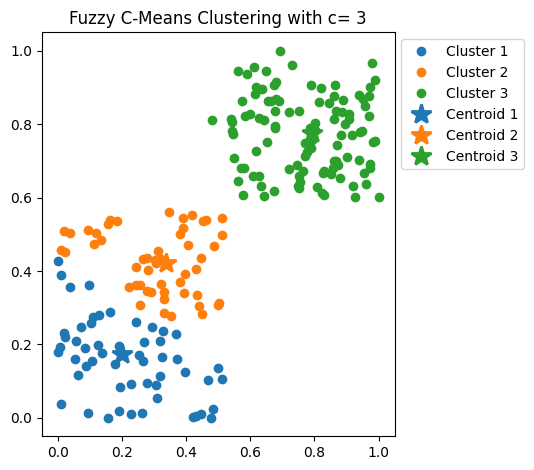

FPC :  0.7288357280846556

 --------------------------------------------- 



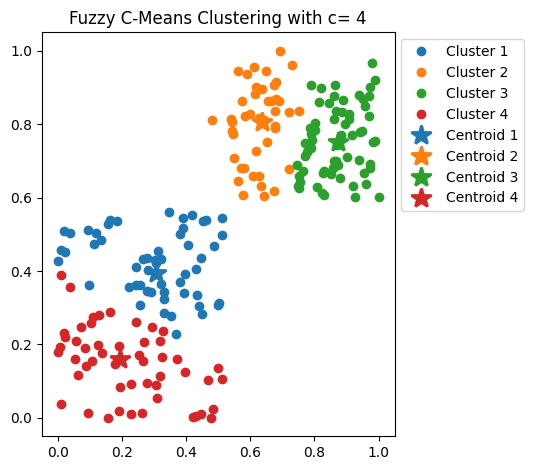

FPC :  0.6482277336580539

 --------------------------------------------- 



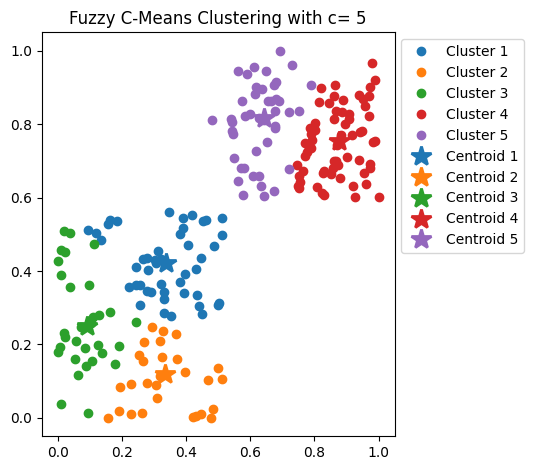

FPC :  0.6197241704982599

 --------------------------------------------- 



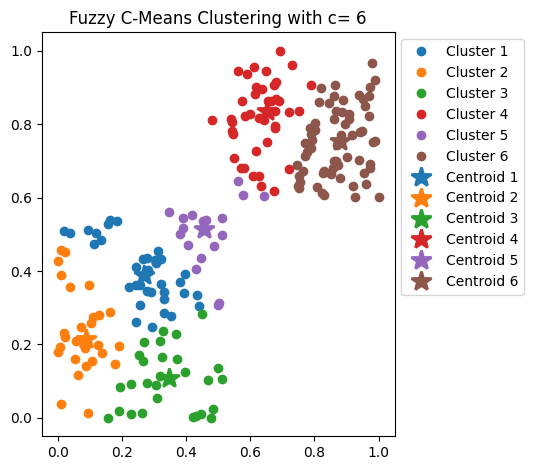

FPC :  0.5875011586048318

 --------------------------------------------- 



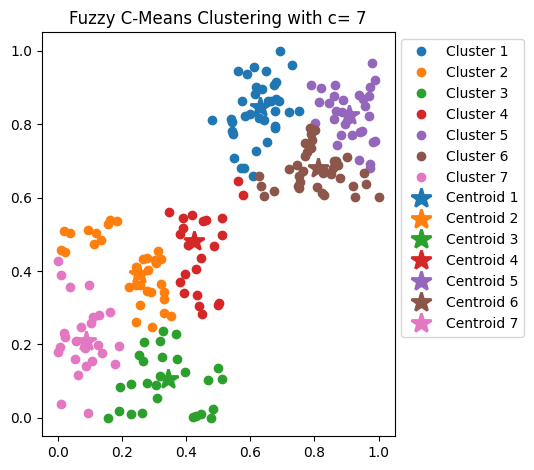

FPC :  0.5639590897510246

 --------------------------------------------- 



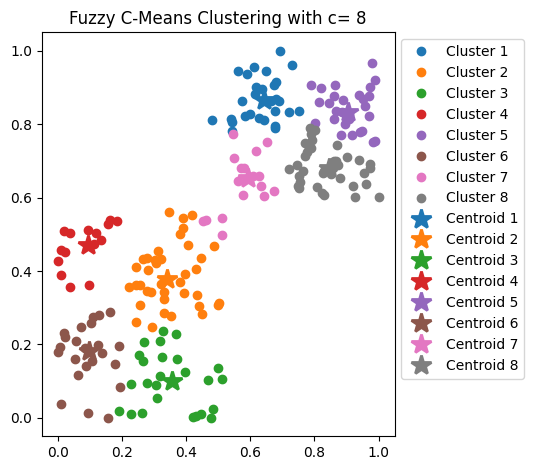

FPC :  0.5631420984151945

 --------------------------------------------- 



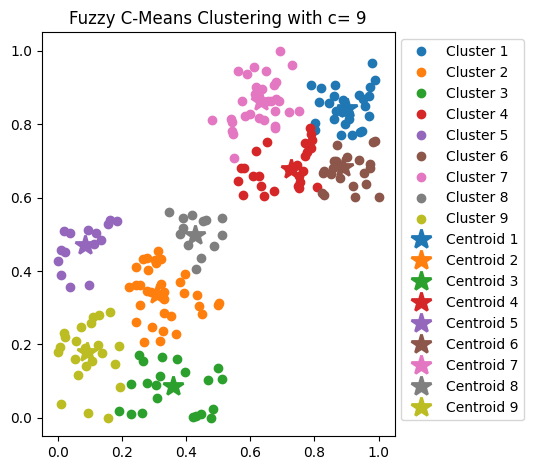

FPC :  0.5403498428940761

 --------------------------------------------- 



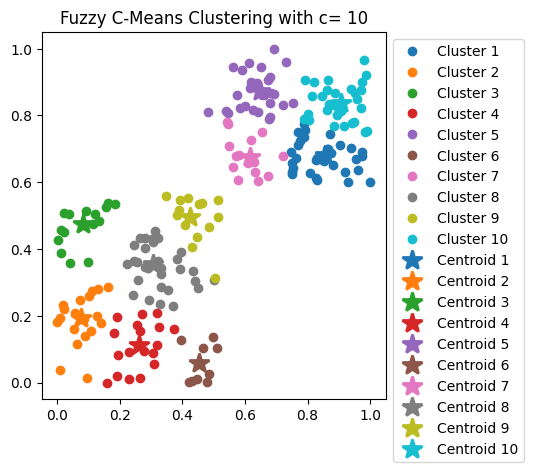

FPC :  0.545943168770415

 --------------------------------------------- 



In [11]:
## running FCM algorithm in range of 2 to 10
data = df[['X', 'Y']].values
fpcs = []
for c in range(2, 11):
    fpc = fcm_algorithm(data, c)
    print("FPC : ",fpc)
    fpcs.append(fpc)
    print('\n --------------------------------------------- \n')

**FPC Graph**

Text(0, 0.5, 'Fuzzy partition coefficient')

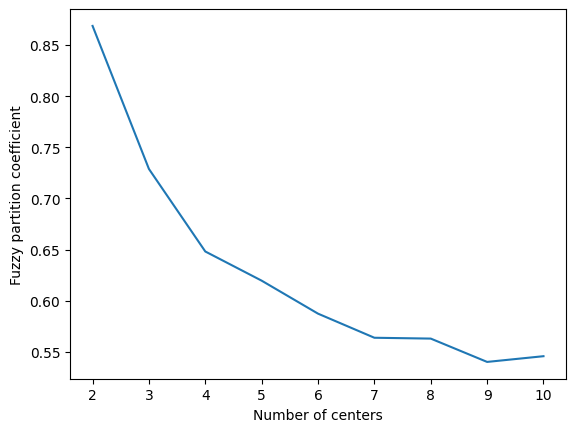

In [12]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")